In [ ]:
#Brittany Toy 
#HW05 

In [40]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from scipy import spatial 
import shapely.geometry
import shapely.ops
from scipy import interpolate


['Arizona' 'California' 'Colorado' 'Connecticut' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Missouri' 'Nebraska' 'Nevada' 'New Jersey' 'New Mexico'
 'New York' 'Ohio' 'Pennsylvania' 'Utah' 'West Virginia']


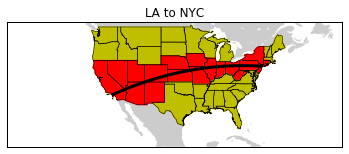

In [35]:
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
m.readshapefile('../python4geosciences/materials/states_21basic/states', 'states')
m.fillcontinents();
a, b = m.gcpoints(-118.4081,33.9425 ,-74.1686 ,40.6925 , 1000)
plt.plot(a,b,'-k',lw=3)
plt.title('LA to NYC')
poly=[]
for i in range(0,len(a)):
    poly.append(shapely.geometry.Point(a[i], b[i]))
line = shapely.geometry.LineString(poly).buffer(100000) 
polys=[]
for state in m.states:
    polys.append(shapely.geometry.Polygon(state))
s=[]
for i in range(len(polys)):
    if polys[i].intersects(line):
        color = 'r'
        s.append(m.states_info[i]['STATE_NAME'])
    else:
        color = 'y'
    coords = shapely.ops.cascaded_union(polys[i].boundary).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color)
print(np.unique(s))    
  

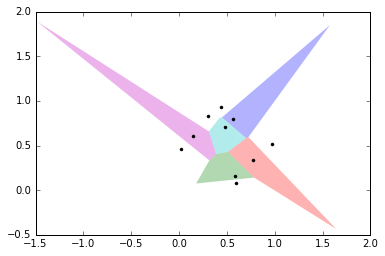

In [5]:
#2 Area in a Voronoli Diagram 
p = np.array([[ 0.77354201,  0.34072038],
           [ 0.43807549,  0.93001924],
           [ 0.5624092 ,  0.79438991],
           [ 0.02536295,  0.46180244],
           [ 0.59533179,  0.07522803],
           [ 0.47867418,  0.70302822],
           [ 0.30371564,  0.83135442],
           [ 0.5856915 ,  0.16340903],
           [ 0.14700491,  0.60268997],
           [ 0.97098631,  0.51692456]])
v = spatial.Voronoi(p)

for indices in v.regions:
    if not indices: 
        continue
    if -1 in indices: 
        continue 
    plt.fill(v.vertices[indices, 0], v.vertices[indices, 1], edgecolor='none', alpha=0.3)
plt.plot(p[:,0], p[:,1],'.k')
    


In [34]:
#2 part 2
lines = [shapely.geometry.LineString(v.vertices[line]) for line in v.ridge_vertices if -1 not in line]

poly = []
area=0
area1=0
area01=0
area001=0

for poly in shapely.ops.polygonize(lines):
    polys.append(poly)
    area=poly.area
    area1+=poly.buffer(-0.1).area
    area01+=poly.buffer(-0.01).area
    area001+=poly.buffer(-0.001).area
    
print(area)  
print(area1/area)
print(area01/area)
print(area001/area)

0.11884011200879535
0.7886781128096366
7.381960770675028
8.412885539785334


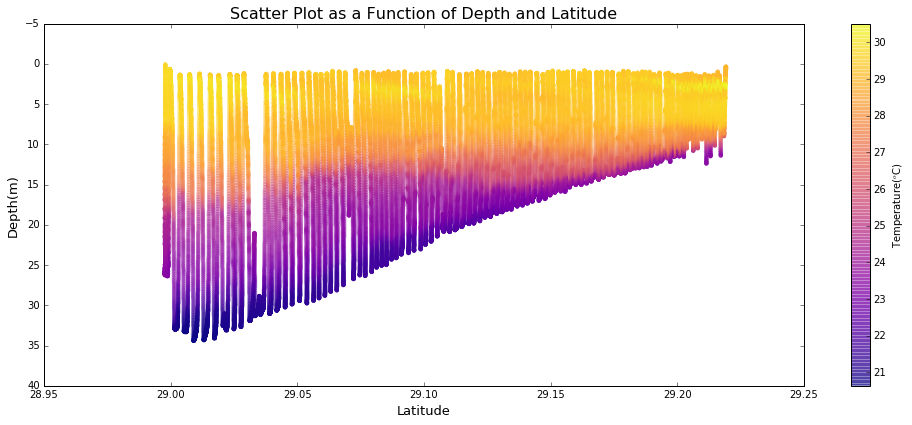

In [38]:
#3 2D interplation
#part 1 Scatter Plot
d = np.loadtxt('../python4geosciences/data/MS03_L15.txt', comments='*')
fig = plt.figure(figsize=(14,6))
lat = d[:,0]
depth = d[:,2]
temp = d[:,3]
p=plt.scatter(lat, depth,c=temp, lw=0, cmap='plasma', alpha=0.5)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Depth(m)', fontsize=13)
plt.title('Scatter Plot as a Function of Depth and Latitude', fontsize=16)
plt.gca().invert_yaxis()
fig.colorbar(p).set_label('Temperature($^{o}$C)')
fig.tight_layout()

In [43]:
#3 part 2
x, y = np.linspace(lat.min(), lat.max(), 500), np.linspace(depth.min(), depth.max(), 900)
x, y = np.meshgrid(x, y)
z = scipy.interpolate.griddata((lat, depth), temp, (x, y), method='cubic')
fig = plt.figure(figsize=(14,6))
g = plt.contourf(x,y,z,29, cmap='magma')
plt.set_ylabel('Depth [m]', size=13)
plt.set_xlabel('Latitude [$^{o}$N]', size=13)
fig.colorbar(g).set_label('Temperature [$^{o}$C]', size=12)
plt.invert_yaxis()

NameError: name 'scipy' is not defined